In [53]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/train.csv")
print(df.shape)
print(df.columns)
df.head()

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
df.drop(["Ticket", "Cabin", "Name"], axis=1, inplace=True)

In [56]:
df
df.dropna(inplace=True)

In [57]:
df.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [58]:
df.Pclass.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Frequency'>

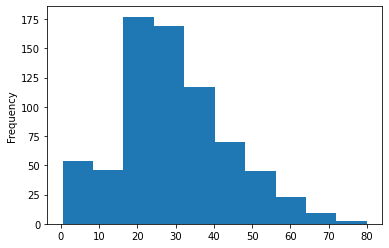

In [59]:
df.Age.plot.hist()

<AxesSubplot:>

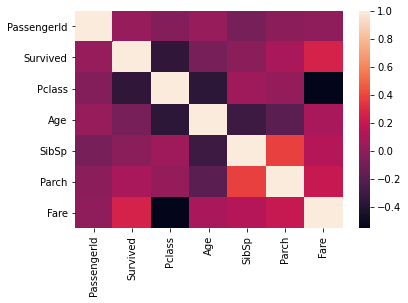

In [60]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)


Selecting features and labels

In [61]:
labels = df.Survived
labels.head()

features = df[["Pclass", "Fare", "Age", "Sex"]]
features.head()

,Pclass,Fare,Age,Sex
0,3,7.2500,22.0,male
1,1,71.2833,38.0,female
2,3,7.9250,26.0,female
3,1,53.1000,35.0,female
4,3,8.0500,35.0,male


In [62]:
features = pd.get_dummies(features,columns=["Pclass","Sex"])
features.head()

,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,7.2500,22.0,0,0,1,0,1
1,71.2833,38.0,1,0,0,1,0
2,7.9250,26.0,0,0,1,1,0
3,53.1000,35.0,1,0,0,1,0
4,8.0500,35.0,0,0,1,0,1


In [63]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.25, stratify = labels, random_state=1)

print ('X train shape:', features_train.shape)
print ('X test shape:', features_test.shape)
print ('y train shape:', labels_train.shape)
print ('y test shape:', labels_test.shape)

X train shape: (534, 7)
X test shape: (178, 7)
y train shape: (534,)
y test shape: (178,)


In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, labels_train)
print ('Model trained!')

Model trained!


In [66]:

print ("Train set accuracy:", model.score(features_train, labels_train))
print ("Test set accuracy:", model.score(features_test, labels_test))

Train set accuracy: 0.8164794007490637
Test set accuracy: 0.7808988764044944


In [77]:
test = np.array([10,60,1,0,0,0,1])
print(model.predict(test.reshape(1,-1)))

[0]
